# 教師あり学習（回帰）

## 概要

[UCI Machine Learning Repository の Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) の
[winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) を使用して,
ワインのアルコール度数 `alcohol` から, ワインの質 `quality` を予測する, 線形単回帰分析を行う.

## 実装

インポート & matplotlib を inline にする.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv> を読み込む.

In [2]:
winequality_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

読み込んだデータから生成された `DataFrame` のインスタンス `winequality_df` は, 以下のようになっている.

In [3]:
winequality_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


説明変数は `alcohol`, 目的変数は `quality` とする.

In [4]:
X = winequality_df[['alcohol']]
y = winequality_df['quality']

説明変数, 目的変数をそれぞれ学習用データ, テスト用データに分割する. 
学習用データとテスト用データの量の比は, $7 : 3$ とし, ランダムに分割するシード値は `0` とする.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

線型回帰モデルである, `LinearRegression` クラスをインスタンス化し, 学習用の説明変数, 目的変数それぞれのデータを用いて学習する.

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

学習の結果, 回帰係数 (`model.coef_`) と, 切片 (`model.intercept_`) が決定した.

In [7]:
model.coef_, model.intercept_

(array([0.35759712]), 1.9289173025860098)

学習用データ, テスト用データそれぞれの決定係数 $R^2$ を算出する.

In [8]:
print(f'train\t: {model.score(X_train, y_train)}')
print(f'test\t: {model.score(X_test, y_test)}')

train	: 0.2138225135588171
test	: 0.2565129403750507


学習用データの実測値を青い点で, 回帰直線を赤い線で示す.

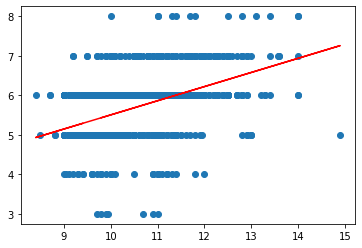

In [9]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color="red")
plt.show()